In [1]:
# Group Project Part 4 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

In [37]:
# Output File (CSV)

upload_data = "Video_Game_Sales_as_of_Jan_2017_Part4.csv"

In [8]:
game_data = pd.read_csv(upload_data)

In [23]:
game_data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,8.3,712.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.0,73.0,8.0,193.0,E
4,Pokemon Red/Pokemon Blue,G,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN


In [13]:
# Total sales of each major publisher

In [36]:
# Total sales of the game globally by year

globally_total = game_data["Global_Sales"].sum().round(2)

print(globally_total)

8994.83


In [344]:
# CLean game_data
gamedata = game_data.dropna(how ='any')

gamedata.to_csv('New_gamedata.csv', index = False)

In [35]:
# Total sales of each publisher globally by year

pub = dict(gamedata.groupby(['Publisher']).sum()['Global_Sales'])
             
pubframe = pd.DataFrame({'Global Sales of Per Publisher':pub})  

pubframe

,Global Sales of Per Publisher
10TACLE Studios,0.02
1C Company,0.07
2D Boy,0.04
3DO,2.48
505 Games,32.27
...,...
Zoo Games,1.34
Zushi Games,0.21
bitComposer Games,0.06
id Software,0.03


In [45]:
Pub_glob_sale = pubframe.sort_values(['Global Sales of Per Publisher'], ascending = False)

Pub_glob_sale

,Global Sales of Per Publisher
Electronic Arts,898.12
Nintendo,862.30
Activision,549.01
Sony Computer Entertainment,395.52
Take-Two Interactive,355.73
...,...
Lighthouse Interactive,0.01
G.Rev,0.01
Team Meat,0.01
Her Interactive,0.01


In [127]:
# Who took the lion’s share of sales for each decade?

In [312]:
# Creating bins to count games in each time period 
# Count for games that have been published for each decade

name_count = gamedata.drop_duplicates("Name")

bins = pd.cut(name_count['Year_of_Release'],[1980, 1990, 2000, 2010, 2020,],
              labels = ['1981 to 1990','1991 to 2000','2001 to 2010', '2011 to 2020'])

name_count.groupby(bins)["Year_of_Release"].agg(["value_counts"])

#name_count.groupby(bins)['Year_of_Release'].agg(["count"])

value_counts
Year_of_Release Year_of_Release              
1981 to 1990    1985.0                      1
                1988.0                      1
1991 to 2000    2000.0                     97
                1999.0                     32
                1998.0                     24
                1997.0                     15
                1996.0                      6
                1994.0                      1
2001 to 2010    2008.0                    389
                2005.0                    376
                2007.0                    372
                2006.0                    356
                2003.0                    341
                2002.0                    339
                2009.0                    337
                2004.0                    335
                2010.0                    269
                2001.0                    230
2011 to 2020    2011.0                    275
                2012.0                    174
                2013.0                    145
                2014.0                    140
                2016.0                    135
                2015.0                    134

In [315]:
# Draft 
y = gamedata

y.groupby(['Year_of_Release','Name'])
              
def lion_analysis(x):
    
    titles = {
        #'User Count':x['User_Count'].sum(),
        #'Critic Score':round(x['Critic_Score'].mean(), 2),
        #'User Score':round(x['User_Score'].mean(), 2),
        'Global Sales':x['Global_Sales'].sum(),
      }

    return pd.Series(titles, index = ['Global Sales'])


y.groupby(['Year_of_Release','Name']).apply(lion_analysis)

Global Sales
Year_of_Release Name                                        
1985.0          Alter Ego                               0.03
1988.0          SimCity                                 0.03
1992.0          Doom                                    0.03
1994.0          Battle Arena Toshinden                  1.27
1996.0          Diablo                                  1.59
...                                                      ...
2016.0          World of Warcraft: Legion               0.37
                Worms: WMD                              0.06
                XCOM 2                                  0.55
                Zero Escape: Zero Time Dilemma          0.17
                Ziggurat                                0.02

[4753 rows x 1 columns]

In [313]:
# Reference:
# https://stackoverflow.com/questions/17764619/pandas-dataframe-group-year-index-by-decade

y = gamedata.copy()

columns = [y.Publisher, (y.Year_of_Release//10)*10]
y_decade = y[['Publisher', 'Global_Sales']].groupby(columns).sum().reset_index()

In [314]:
y_decade.set_index('Year_of_Release')

,Publisher,Global_Sales
Year_of_Release,,
2000.0,10TACLE Studios,0.02
2000.0,1C Company,0.01
2010.0,1C Company,0.06
2000.0,2D Boy,0.04
2000.0,3DO,2.48
...,...,...
2000.0,Zushi Games,0.21
2000.0,bitComposer Games,0.03
2010.0,bitComposer Games,0.03


In [316]:
# Reference:
# https://stackoverflow.com/questions/27842613/pandas-groupby-sort-within-groups

columns = ['Publisher', 'Global_Sales']
y_decade.groupby('Year_of_Release').apply(lambda x: x[columns].sort_values(by ='Global_Sales',
                                                                           ascending = False,
                                                                           ignore_index = True).head(3))

Publisher  Global_Sales
Year_of_Release                                             
1980.0          0                   Activision          0.03
                1                        Maxis          0.03
1990.0          0  Sony Computer Entertainment         68.11
                1                   SquareSoft         17.45
                2           Virgin Interactive         12.16
2000.0          0                     Nintendo        662.92
                1              Electronic Arts        586.41
                2                   Activision        315.96
2010.0          0              Electronic Arts        305.96
                1                   Activision        224.37
                2                     Nintendo        199.38

In [142]:
# The most profitable games overall (TOP 5)

In [331]:
y = gamedata

y.groupby(['Year_of_Release','Publisher','Name'])

def analysis(x):
    titles = {
        'User Count':x['User_Count'].sum(),
        'Critic Score':round(x['Critic_Score'].mean(), 2),
        'User Score':round(x['User_Score'].mean(), 2),
        'Global Sales':x['Global_Sales'].sum(),
    }
    
    return pd.Series(titles, index = ['User Count','Critic Score','User Score','Global Sales'])

z = y.groupby(['Year_of_Release','Publisher','Name']).apply(analysis)

z

User Count  \
Year_of_Release Publisher                              Name                                            
1985.0          Activision                             Alter Ego                                19.0   
1988.0          Maxis                                  SimCity                                4578.0   
1992.0          id Software                            Doom                                   1862.0   
1994.0          Sony Computer Entertainment            Battle Arena Toshinden                    4.0   
1996.0          Activision                             Diablo                                  859.0   
...                                                                                              ...   
2016.0          Warner Bros. Interactive Entertainment Batman: Return to Arkham                128.0   
                                                       LEGO Harry Potter Collection              7.0   
                                                       LEGO Marvels Avengers                   150.0   
                                                       Lego Star Wars: The Force Awakens       120.0   
                Yacht Club Games                       Azure Striker Gunvolt                    63.0   

                                                                                          Critic Score  \
Year_of_Release Publisher                              Name                                              
1985.0          Activision                             Alter Ego                                  59.0   
1988.0          Maxis                                  SimCity                                    64.0   
1992.0          id Software                            Doom                                       85.0   
1994.0          Sony Computer Entertainment            Battle Arena Toshinden                     69.0   
1996.0          Activision                             Diablo                                     94.0   
...                                                                                                ...   
2016.0          Warner Bros. Interactive Entertainment Batman: Return to Arkham                   75.0   
                                                       LEGO Harry Potter Collection               73.0   
                                                       LEGO Marvels Avengers                      67.0   
                                                       Lego Star Wars: The Force Awakens          76.0   
                Yacht Club Games                       Azure Striker Gunvolt                      77.0   

                                                                                          User Score  \
Year_of_Release Publisher                              Name                                            
1985.0          Activision                             Alter Ego                                5.80   
1988.0          Maxis                                  SimCity                                  2.20   
1992.0          id Software                            Doom                                     8.30   
1994.0          Sony Computer Entertainment            Battle Arena Toshinden                   6.30   
1996.0          Activision                             Diablo                                   8.70   
...                                                                                              ...   
2016.0          Warner Bros. Interactive Entertainment Batman: Return to Arkham                 8.35   
                                                       LEGO Harry Potter Collection             8.10   
                                                       LEGO Marvels Avengers                    6.54   
                                                       Lego Star Wars: The Force Awakens        7.50   
                Yacht Club Games                       Azure Striker Gunvolt                    8.40   

     

In [332]:
z = y.groupby(['Year_of_Release','Publisher','Name']).apply(analysis)

z.nlargest(5,'Global Sales')

,,,User Count,Critic Score,User Score,Global Sales
Year_of_Release,Publisher,Name,,,,
2006.0,Nintendo,Wii Sports,324.0,76.0,8.00,82.54
2013.0,Take-Two Interactive,Grand Theft Auto V,7731.0,97.0,8.15,37.42
2008.0,Nintendo,Mario Kart Wii,712.0,82.0,8.30,35.57
2009.0,Nintendo,Wii Sports Resort,193.0,80.0,8.00,32.78
2010.0,Activision,Call of Duty: Black Ops,4349.0,82.0,5.94,30.89


In [345]:
# Top 3 most profitable games (pie chart) overall 

Best_game = y[y['Global_Sales'] >= 30]
Best_game

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,8.3,712.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.0,73.0,8.0,193.0,E


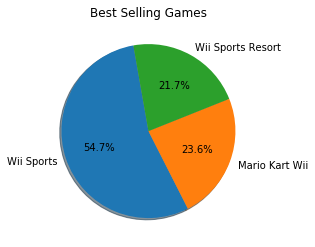

In [351]:

labels = list(Best_game['Name'])
sizes = list(Best_game['Global_Sales'])
#explode = (0, 0)

fig, bx = plt.subplots()
bx.pie(sizes, labels = labels, autopct = '%1.1f%%',
        shadow = True, startangle = 100)

ax1.axis('equal')

plt.title('Best Selling Games')
plt.savefig('Best Selling Games', bbox_inches='tight', dpi = 600)

plt.show()